In [1]:
import numpy as np
from sklearn.datasets import make_moons, fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pylab as plt
import itertools

In [4]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 23.2 MB 1.6 MB/s 


In [22]:
dataset = fetch_covtype(shuffle=True,as_frame=True) # flag de shuffle activado para que nos entregue los datos ya mezclados
dataframe = dataset.frame
dataframe.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2909.0,298.0,25.0,192.0,101.0,4990.0,143.0,222.0,216.0,4791.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2967.0,278.0,14.0,212.0,33.0,3948.0,180.0,241.0,201.0,666.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3250.0,17.0,10.0,750.0,86.0,2813.0,212.0,219.0,144.0,3319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2867.0,330.0,25.0,351.0,159.0,2971.0,153.0,201.0,182.0,1739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2758.0,70.0,19.0,90.0,15.0,2764.0,237.0,199.0,86.0,6460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [23]:
import pandas as pd

df1 = dataframe[dataframe['Cover_Type']==1].sample(n=1000)
df2 = dataframe[dataframe['Cover_Type']==2].sample(n=1000)
df3 = dataframe[dataframe['Cover_Type']==3].sample(n=1000)
df4 = dataframe[dataframe['Cover_Type']==4].sample(n=1000)
df5 = dataframe[dataframe['Cover_Type']==5].sample(n=1000)
df6 = dataframe[dataframe['Cover_Type']==6].sample(n=1000)
df7 = dataframe[dataframe['Cover_Type']==7].sample(n=1000)

df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
277466,3120.0,357.0,19.0,828.0,-24.0,1154.0,187.0,202.0,150.0,1641.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
522800,3217.0,221.0,13.0,488.0,107.0,1443.0,204.0,252.0,182.0,2505.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
124958,3050.0,12.0,8.0,330.0,75.0,5248.0,212.0,224.0,149.0,3690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
267772,3142.0,33.0,10.0,323.0,51.0,1648.0,218.0,218.0,135.0,3433.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
183235,3116.0,37.0,20.0,60.0,-4.0,2866.0,216.0,193.0,105.0,3955.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
X = df.iloc[:,1:54].to_numpy()
Y = df['Cover_Type'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test) #ojo que no se hace el fit con los datos de test, solo con los de train

In [40]:
C_value=1.0
gamma=1.0

In [41]:

classifier = SVC(C=C_value, kernel='rbf', gamma=gamma, probability=True,decision_function_shape='ovr')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(Y_pred)

[3 2 5 ... 3 4 3]


In [42]:

# calculate accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)*100
recall = metrics.recall_score(Y_test, Y_pred, average='macro')*100
print("Classification accuracy is %2f"%accuracy,"%")
print("Classification recall is %2f"%recall,"%")

Classification accuracy is 73.476190 %
Classification recall is 73.476190 %



Promedio recall por clase (validacion) 0.735
Promedio recall por clase (training) 0.948
Numero de ejemplos en validacion clasificados correctamente: 1543


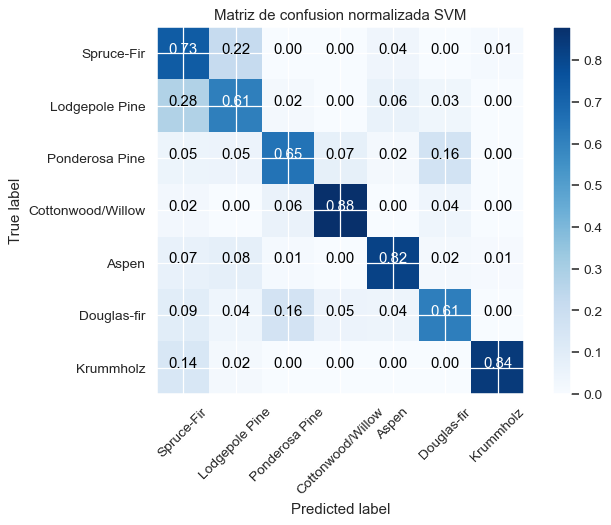

In [50]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

def mean_recall(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm.diagonal().mean()

def plot_confusion_matrix(cm, classes,
                          normalized=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Matriz de confusion normalizada SVM'
        fmt = '.2f'
    else:
        title='Matriz de confusion no normalizada'
        fmt = 'd'
        
    plt.figure(figsize=(8, 6), dpi=90)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')
    plt.tight_layout()
target_names = [
    'Spruce-Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]

plot_confusion_matrix(cm, target_names, normalized=True)

print('\nPromedio recall por clase (validacion) %.3f' % mean_recall(cm))
Y_train_pred = classifier.predict(X_train)
train_cm = confusion_matrix(Y_train, Y_train_pred)
print('Promedio recall por clase (training) %.3f' % mean_recall(train_cm))
print('Numero de ejemplos en validacion clasificados correctamente: %d' % accuracy_score(Y_test, Y_pred, normalize=False))

In [51]:
len(Y_test)

2100

Text(120.5, 0.5, 'True Label')

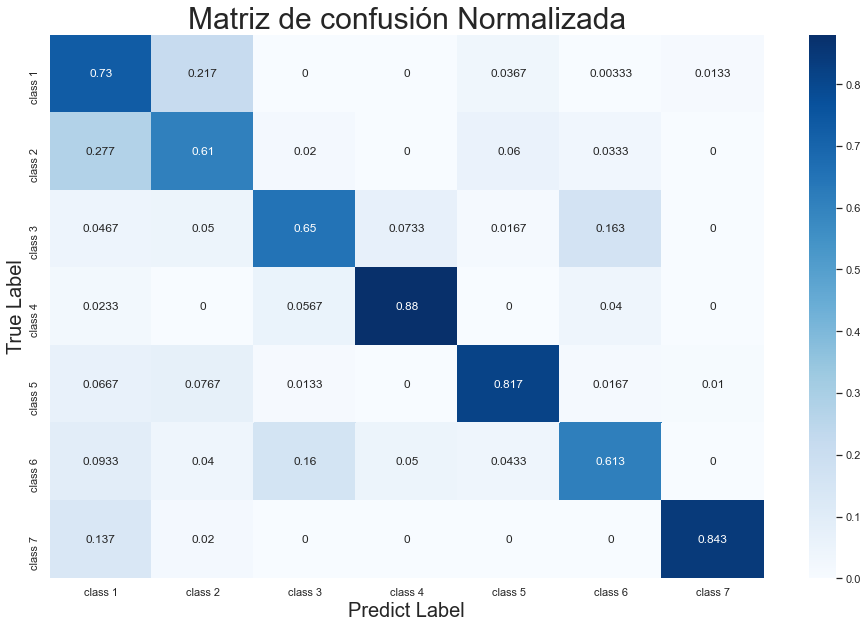

In [47]:

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(Y)]

confm = confusion_matrix(Y_test, Y_pred, normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión Normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

700 SVs para la clase 1
700 SVs para la clase 2
700 SVs para la clase 3
696 SVs para la clase 4
695 SVs para la clase 5
699 SVs para la clase 6
699 SVs para la clase 7


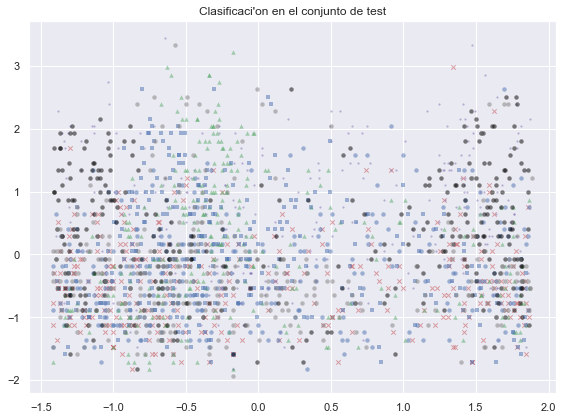

In [21]:
fig = plt.figure(figsize=(8, 6))


Y_pred = classifier.predict(X_test)
plt.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c='r', 
           marker='x', vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=20, label='Clase 1')
plt.scatter(X_test[Y_test==2, 0], X_test[Y_test==2, 1], c='b', 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.scatter(X_test[Y_test==3, 0], X_test[Y_test==3, 1], c='m', 
           marker='.', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.scatter(X_test[Y_test==4, 0], X_test[Y_test==4, 1], c='g', 
           marker='^', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.scatter(X_test[Y_test==5, 0], X_test[Y_test==5, 1], c='b', 
           marker='s', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.scatter(X_test[Y_test==6, 0], X_test[Y_test==6, 1], c='black', 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.scatter(X_test[Y_test==7, 0], X_test[Y_test==7, 1], c='gray', 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')



plt.tight_layout()
print("%d SVs para la clase 1" % (classifier.n_support_[0]))
print("%d SVs para la clase 2" % (classifier.n_support_[1]))
print("%d SVs para la clase 3" % (classifier.n_support_[2]))
print("%d SVs para la clase 4" % (classifier.n_support_[3]))
print("%d SVs para la clase 5" % (classifier.n_support_[4]))
print("%d SVs para la clase 6" % (classifier.n_support_[5]))
print("%d SVs para la clase 7" % (classifier.n_support_[6]))